In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Hypothesis Testing

In Data8.2x, you have been using simulation to conduct hypothesis testing. Now that we have completed Data8.2x, this is a good time to take a step back and reflect on hypothesis testing. 

Every hypothesis test has roughly the same structure. The following 4 steps provide a rough outline:

1) State the null and alternate hypotheses. Generally, the alternate hypothesis is what you are trying to show. Essentially, if you want to show a result, we assume the opposite is true and try to prove ourselves wrong. 

2) Determine/calculate a test statistic. See your book for a formal definition, but generally, the test statistic is any quantity that helps us evaluate our sample with respect to our null hypothesis. 

3) Determine distribution of test statistic and compute a $p$-value. If you have taken inferential statistics before, you likely computed a $z$ or $t$ statistic and used a calculator or table to compute a $p$-value. This is based on asymptotic theory of sample means/proportions. This is not the approach taken in Data8.2x. With better computing power, we can use simulation to obtain an empirical distribution of our test statistic under the null hypothesis. 

4) Conclude. For low $p$-value (generally below 0.05), we reject the null hypothesis. For high $p$-value, we fail to reject. Low $p$-value implies that our sample would be very unusual if the null hypothesis were actually true. Therefore, that is evidence that the null hypothesis is wrong. 

### Example

Let's work through an example. Suppose that in the upcoming election, Referendum A is up for approval in Colorado. You suspect that in El Paso County, more than half of eligible voters support the referendum. You collect a random sample of 200 eligible voters in El Paso County and 115 of them express support. Is there evidence to conclude that supports your suspicion? 

#### Step 1: Hypothesis

State the null and alternative hypotheses.

$H_0$: There are an equal number of supporters and nonsupporters.  So for any given person the chance they will support is a fair coin flip.  
$H_1$: There are an unqual number of supporters and nonsupporters.

#### Step 2: Test Statistic

Select a test statistic and compute that test statistic for the sample.

The test statistic will be the distance $(abs())$ between the number of supports and the value expected under null, which is half (100 for a sample size of 200)

In [43]:
obs_supts = 115
exp_supts = 100
obs_test_statistic = abs(obs_supts-exp_supts)
print("The test statistic for this sample is",obs_test_statistic)

The test statistic for this sample is 15


#### Step 3: $p$-value

3a) If $H_0$ were true, what should the value of $\hat{p}$ be close to? In other words, if in fact, half of eligible voters support the referendum, what value should your test statistic take? 

Under the $H_0$ the test statistic should be $0$.

3b) In words (and in the context of this problem), describe what the $p$-value is. 

The $p-$value is the likelihood that the number of voters that support Referendum A in our sample is due to random chance drawing from a population that actually has an equal number of supporters and nonsupporters.

3c) Find the $p$-value directly and using simulation. Hint: the binomial distribution will be of use here. 

In [82]:
# we will use the scipy binomial distribution ...
# ... first to directly calculate the p-value ...
# we will call "successes supporters" and "failures" nonsupporters.  Under null they are equally likely, so p=0.5
# the p-score is the chance of getting a more extreme event, or a test score higher than what was observed (15).
# this is the same as the likelihood of observing more than 115 success or fewer than 85 success in 200 trials

stats.binom.cdf(85,200,0.5)+stats.binom.sf(115,200,0.5)

0.03408129942316154

In [94]:
# ... then to simulate drawing some random samples.

# simulate it 'trials' times
trials = 10000
bi_statistics = np.array([])
for _ in np.arange(trials):
    bi_sample = stats.binom.rvs(200,0.5)
    this_statistic = abs(bi_sample-exp_supts)
    bi_statistics = np.append(bi_statistics,this_statistic)
# find the p-score as the % that are farther away than the observed statistic
this_p = np.mean(bi_statistics>obs_test_statistic)
print("The p-score is",this_p)

The p-score is 0.0306


#### Step 4: Conclude

What is your conclusion? Be sure to state your conclusion in the context of the problem.

We reject the null hypothesis, and believe there is not an equal number of supports and nonsupporters for Referendum A.  

## Confidence Intervals

Construct and interpret a 95% confidence interval on $p$, the true proportion of eligible El Paso County voters who support the referendum. There are many ways to construct such an interval (bootstrap, the binomial distribution, asymptotically). Select one and implement. 

Also, compare your interval to the results of your hypothesis test. Does your interval contain the value 0.5? Why does that matter? 

In [112]:
# first create the observed sample
observed_samp = Table().with_column("Supporters",np.append(np.ones(obs_supts),np.zeros(200-obs_supts)))

# bootstrap
repeat = 500
ps=[]
for _ in np.arange(repeat):
    this_resample = observed_samp.sample()
    this_proportion = np.mean(this_resample.column(0))
    ps = np.append(ps,this_proportion)

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


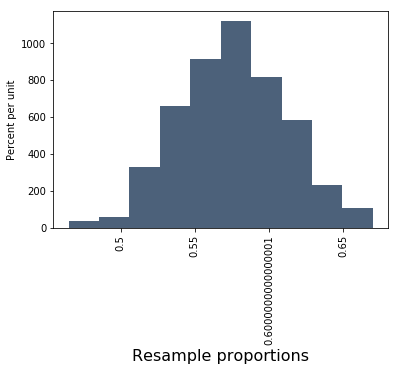

In [113]:
# plot
Table().with_column("Resample proportions",ps).hist()

In [114]:
left_95 = percentile(2.5,ps)
right_95 = percentile(97.5,ps)
print("The 95% confidence interval is [",left_95, right_95,"]")

The 95% confidence interval is [ 0.51 0.645 ]


This 95% confidence interval does not contain 0.5.  This is consistent with us rejecting the null hypothesis (which has $p=0.5$) because its $p$-score was $<5$.